# Détermination de la bande interdite

In [134]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
with MPRester("5Gk9CNnZ5XHAgFnn") as m:

    bandStr=m.get_bandstructure_by_material_id("mp-11742")

# Bande interdite

In [135]:
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
from matplotlib import pyplot as plt

data=BSPlotter(bandStr).bs_plot_data()
en=data.get("energy")
dist=data['distances']

#print(data)
print("Bande interdite :")
print(data.get('band_gap'))
print("La bande interdite est donc indirecte, son énergie est de 1.2919999999999998 eV et la transition dans la bande est \Gamma-F.")
print()

Bande interdite :
Indirect \Gamma-F bandgap = 1.2919999999999998
La bande interdite est donc indirecte, son énergie est de 1.2919999999999998 eV et la transition dans la bande est \Gamma-F.



# Bande de valence

In [136]:
print("Bande de valence :")
print(bandStr.get_vbm().get('band_index'))
print("La dernière bande de valence est donc la 15ème bande et la plus haute énergie de la bande est de", bandStr.get_vbm().get('energy'), "eV.")
print()

minBranch=-1
minSlope=20.0
maxBranch=-1
maxSlope=0.0

for i in range(0,len(en)):
    vB0 = en[i]['1'][15][0]
    vB1 = en[i]['1'][15][-1]
    d0=dist[i][0]
    d1=dist[i][-1]
    m=abs((vB1-vB0)/(d1-d0))
    
    if m<minSlope: #min
        minSlope=m
        minBranch=i
        
    if m>maxSlope: #max
        maxSlope=m
        maxBranch=i
        
print("La bande de valence présente le moins de dispersion dans la direction", minSlope, "qui se trouve sur la branche délimitée par F et P_1, et présente le plus de dispersion dans la direction", maxSlope, "qui se trouve sur la branche délimitée par Γ et X|Q. (Si on commence à compte les directions sont données en valeur absolue.)")
print()

v0x0=dist[minBranch][0]
v0y0=en[minBranch]['1'][15][0]
v0x1=dist[minBranch][-1]
v0y1=en[minBranch]['1'][15][-1]

v1x0=dist[maxBranch][0]
v1y0=en[maxBranch]['1'][15][0]
v1x1=dist[maxBranch][-1]
v1y1=en[maxBranch]['1'][15][-1]

Bande de valence :
defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
La dernière bande de valence est donc la 15ème bande et la plus haute énergie de la bande est de 2.6151 eV.

La bande de valence présente le moins de dispersion dans la direction 0.17432474679614923 qui se trouve sur la branche délimitée par F et P_1, et présente le plus de dispersion dans la direction 1.187683233343578 qui se trouve sur la branche délimitée par Γ et X|Q. (Si on commence à compte les directions sont données en valeur absolue.)



# Bande de conduction

Bande de conduction :
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
La première bande de conduction est donc la 16ème bande et la plus basse énergie de la bande est de 3.9071 eV.

La bande de conduction présente le moins de dispersion dans la direction 0.109146977924026 qui se trouve sur la branche délimitée par Z et Γ, et présente le plus de dispersion dans la direction 2.4753408228799887 qui se trouve sur la branche délimitée par X|Q et F. (Si on commence à compte les directions sont données en valeur absolue.)



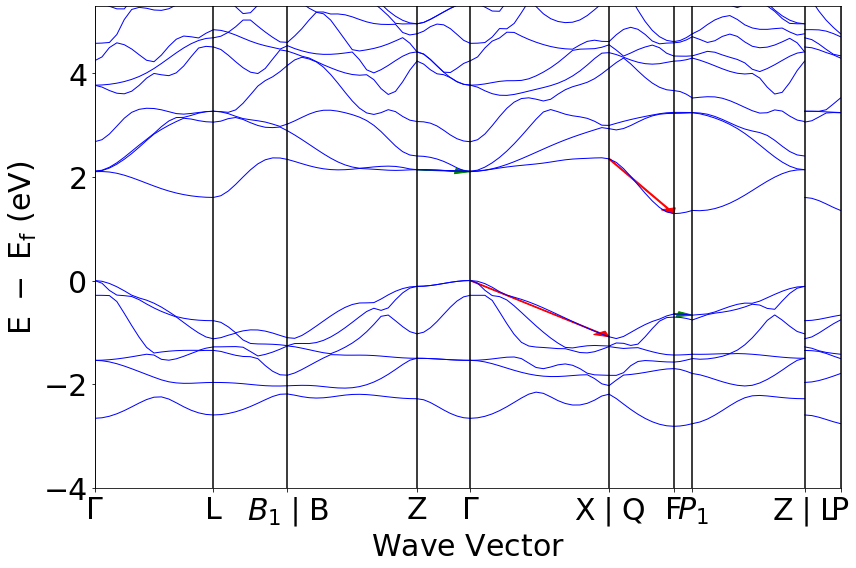

In [137]:
print("Bande de conduction :")
print(bandStr.get_cbm().get('band_index'))
print("La première bande de conduction est donc la 16ème bande et la plus basse énergie de la bande est de", bandStr.get_cbm().get('energy'), "eV.")
print()

minBranch=-1
minSlope=20.0
maxBranch=-1
maxSlope=0.0

for i in range(0,len(en)):
    vB0 = en[i]['1'][16][0]
    vB1 = en[i]['1'][16][-1]
    d0=dist[i][0]
    d1=dist[i][-1]
    m=abs((vB1-vB0)/(d1-d0))
    
    if m<minSlope: #min
        minSlope=m
        minBranch=i
        
    if m>maxSlope: #max
        maxSlope=m
        maxBranch=i
        
print("La bande de conduction présente le moins de dispersion dans la direction", minSlope, "qui se trouve sur la branche délimitée par Z et Γ, et présente le plus de dispersion dans la direction", maxSlope, "qui se trouve sur la branche délimitée par X|Q et F. (Si on commence à compte les directions sont données en valeur absolue.)")
print()

    
c0x0=dist[minBranch][0]
c0y0=en[minBranch]['1'][16][0]
c0x1=dist[minBranch][-1]
c0y1=en[minBranch]['1'][16][-1]

c1x0=dist[maxBranch][0]
c1y0=en[maxBranch]['1'][16][0]
c1x1=dist[maxBranch][-1]
c1y1=en[maxBranch]['1'][16][-1]


BSPlotter(bandStr).get_plot()

plt.arrow(v0x0,v0y0,v0x1-v0x0,v0y1-v0y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green', width=0.01)
plt.arrow(v1x0,v1y0,v1x1-v1x0,v1y1-v1y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red', width=0.01)

plt.arrow(c0x0,c0y0,c0x1-c0x0,c0y1-c0y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green', width=0.01)
plt.arrow(c1x0,c1y0,c1x1-c1x0,c1y1-c1y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red', width=0.01)

# Masse effective

## Bande de valence

In [138]:
hBar=6.58212e-16
evToJoule=1.6022e-19
kpoint_coord=bandStr.get_vbm()['kpoint'].cart_coords
kSq=kpoint_coord[0]**2+kpoint_coord[1]**2+kpoint_coord[2]**2
en=bandStr.get_vbm()['energy']*evToJoule
m=(hBar**2 * kSq)/(2*en)
print("La masse effective au sommet de la dernière bande de valence est de", m, "kg.")

La masse effective au sommet de la dernière bande de valence est de 0.0 kg.


## Bande de conduction

In [139]:
kpoint_coord=bandStr.get_cbm()['kpoint'].cart_coords
kSq=kpoint_coord[0]**2+kpoint_coord[1]**2+kpoint_coord[2]**2
en=bandStr.get_cbm()['energy']*evToJoule
m=(hBar**2 * kSq)/(2*en)
print("La masse effective à la base de la première bande de conduction est de", m, "kg.")

La masse effective à la base de la première bande de conduction est de 2.2655577007048528e-13 kg.
